In [16]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [17]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [18]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [19]:
def sigmoid(z):
    A = 1 / (1 + np.exp(-1 * z))
    return  A

Text(0.5, 1.0, "Image of : b'non-cat'")

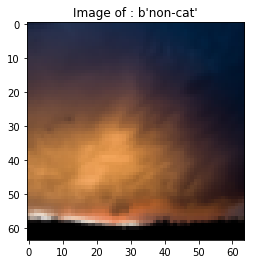

In [25]:
plt.imshow(train_set_x_orig[0])
plt.title("Image of : "+str(classes[train_set_y[0,0]]))

Text(0.5, 1.0, "Image of : b'cat'")

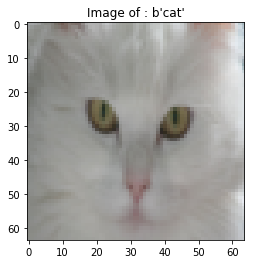

In [26]:
plt.imshow(train_set_x_orig[50])
plt.title("Image of : "+str(classes[train_set_y[0,50]]))

In [22]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*train_set_x_orig.shape[3]).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*test_set_x_orig.shape[3]).T

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [27]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

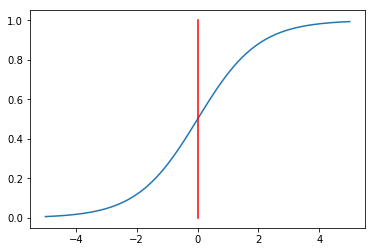

In [28]:
plt.plot(np.linspace(-5,5,500),sigmoid(np.linspace(-5,5,500)))
plt.plot(np.zeros(101),np.linspace(0,1,101),'r')

In [30]:
train_set_x_flatten.shape

(12288, 209)

In [31]:
test_set_x_flatten.shape

(12288, 50)

In [32]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (1/m) * np.sum((-1) * (Y*np.log(A) + (1-Y)*np.log(1-A)))
    
    dz = A-Y
    
    dw = (1/m) * np.dot(X,(A-Y).T)
    db = (1 / m) * np.sum(A-Y)
    
    grads = {
        "dw" : dw,
        "db" : db,
    }
    
    return grads, cost

In [33]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    
    m = X.shape[1]
    
    
    costs = []
    for i in range(num_iterations):
        grads,cost = propagate(w,b,X,Y)
    
        dw = grads['dw']
        db = grads['db']
        
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i%100==0:
            costs.append(cost)
        
        
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [34]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    A = sigmoid(np.dot(w.T,X)+b)    
    
    for i in range(A.shape[1]):
        if A[0,i]<=0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
            
    return Y_prediction

In [35]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    
    
    w, b = np.zeros((X_train.shape[0],1)),0

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [36]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


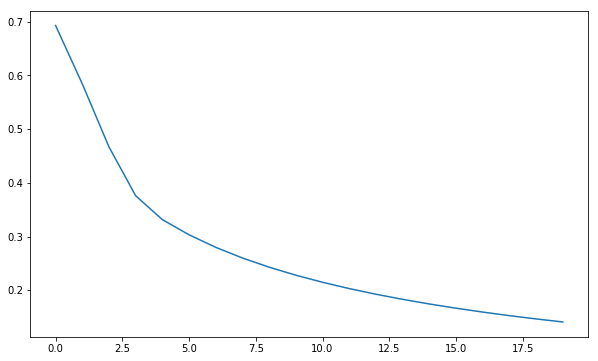

In [37]:
plt.figure(figsize=(10,6))
plt.plot(d['costs'])

In [38]:
len(d["costs"])

20

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



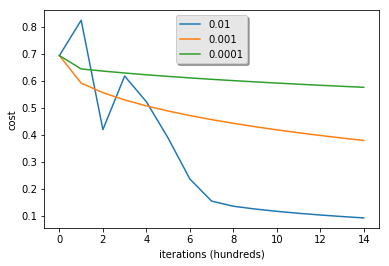

In [39]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()